In [13]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split

%matplotlib inline

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

#Read input data
train_data = pd.read_csv('/content/drive/MyDrive/ML/titanic-ml-project/data/processed/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ML/titanic-ml-project/data/processed/test.csv')


In [16]:
# Define features and target variable
X_train = train_data.drop(columns=["PassengerId", "Survived"])
Y_train = train_data['Survived']

X_test = test_data.drop(columns=["PassengerId"])

## HistGradientBoostingClassifier

In [17]:
from sklearn.ensemble import HistGradientBoostingClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Initialize and fit the model with the best parameters
model = HistGradientBoostingClassifier(
    min_samples_leaf=7,
    max_iter=558,
    max_depth=4,
    max_bins=38,
    learning_rate=0.446,
    early_stopping=True
)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Prepare submission file
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": Y_pred
})

# Save with full path (Colab default path)
submission.to_csv("/content/drive/MyDrive/ML/titanic-ml-project/data/submission/HistGradientBoostingClassifier.csv", index=False)

## XGBoost

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the XGBoost model with the specified hyperparameters
model = xgb.XGBClassifier(
    subsample=0.75,
    reg_lambda=0.12,
    reg_alpha=0.44,
    n_estimators=91,
    max_depth=6,
    learning_rate=0.16,
    gamma=0.2,
    colsample_bytree=0.9,
    eval_metric='mlogloss'  # Change this based on your task (e.g., 'logloss' for binary classification)
)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Prepare submission file
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": y_pred
})

# Save with full path (Colab default path)
submission.to_csv("/content/drive/MyDrive/ML/titanic-ml-project/data/submission/xgboost.csv", index=False)


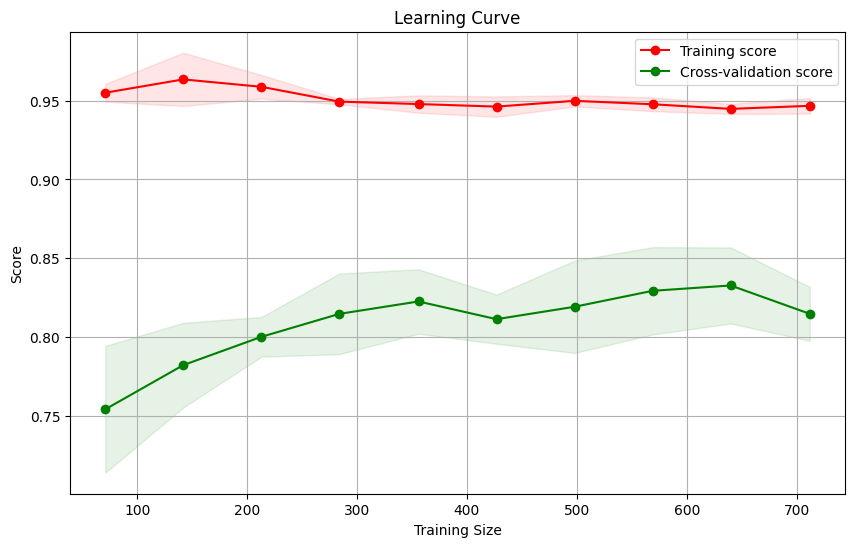

In [19]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


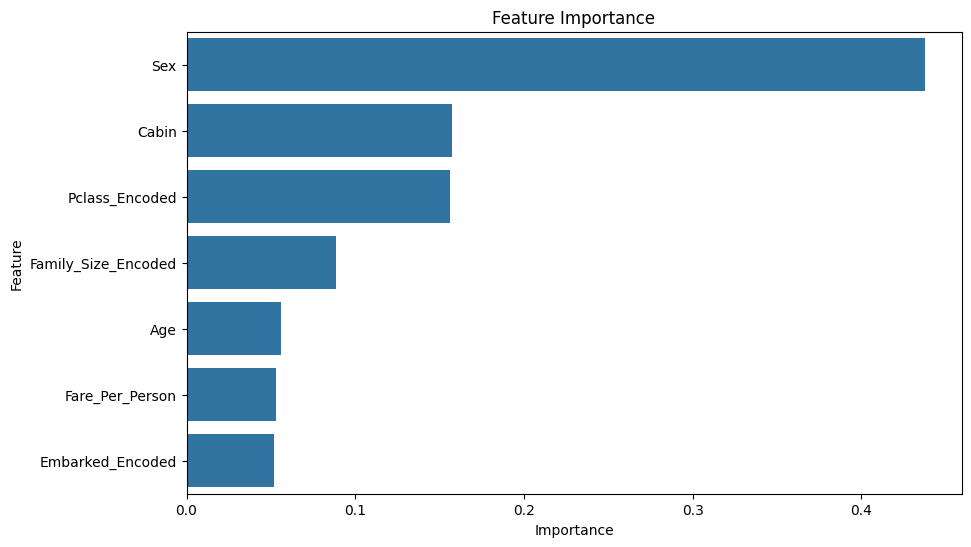

In [20]:
import seaborn as sns

# Get feature importance
importance = model.feature_importances_

feature_names = X_train.columns  # Assuming X_train is a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


## Random Forest

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the Random Forest model with specified parameters
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    max_features=0.5,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)

rf_model.fit(X_train, Y_train)

# Make predictions
Y_pred = rf_model.predict(X_test)

# Prepare submission file
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": Y_pred
})

# Save with full path (Colab default path)
submission.to_csv("/content/drive/MyDrive/ML/titanic-ml-project/data/submission/RandomForestClassifier.csv", index=False)


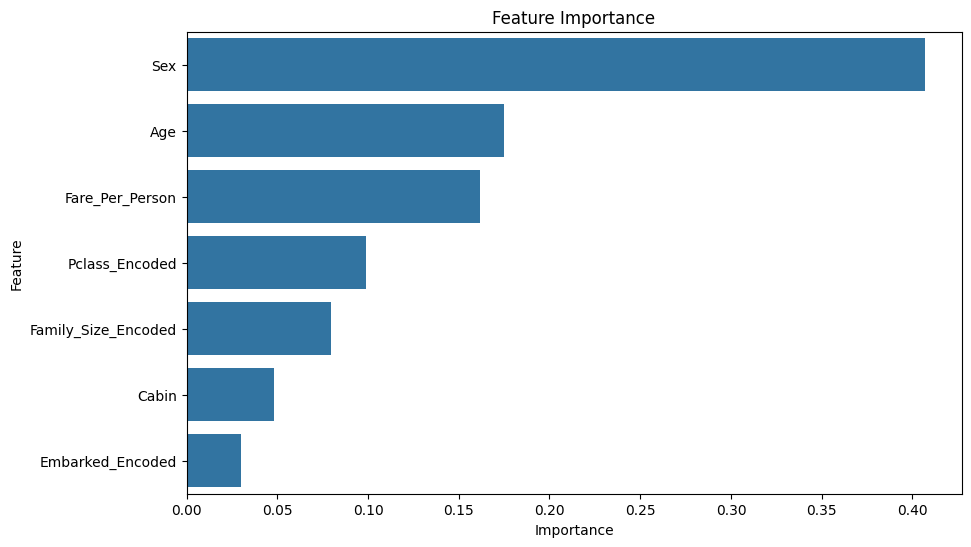

In [22]:
import pandas as pd

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


## DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier with optimized parameters
dt = DecisionTreeClassifier(max_depth=18, max_features='sqrt', min_samples_leaf=0.01, min_samples_split=0.061, random_state=42)

# Train the model
dt.fit(X_train, Y_train)

# Make predictions on the test set
Y_dt_opt_pred = dt.predict(X_test)

target_names = ['Didnt Survived', 'Survived']

# Prepare submission file
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": Y_dt_opt_pred
})

# Save with full path (Colab default path)
submission.to_csv("/content/drive/MyDrive/ML/titanic-ml-project/data/submission/DecisionTreeClassifier.csv", index=False)

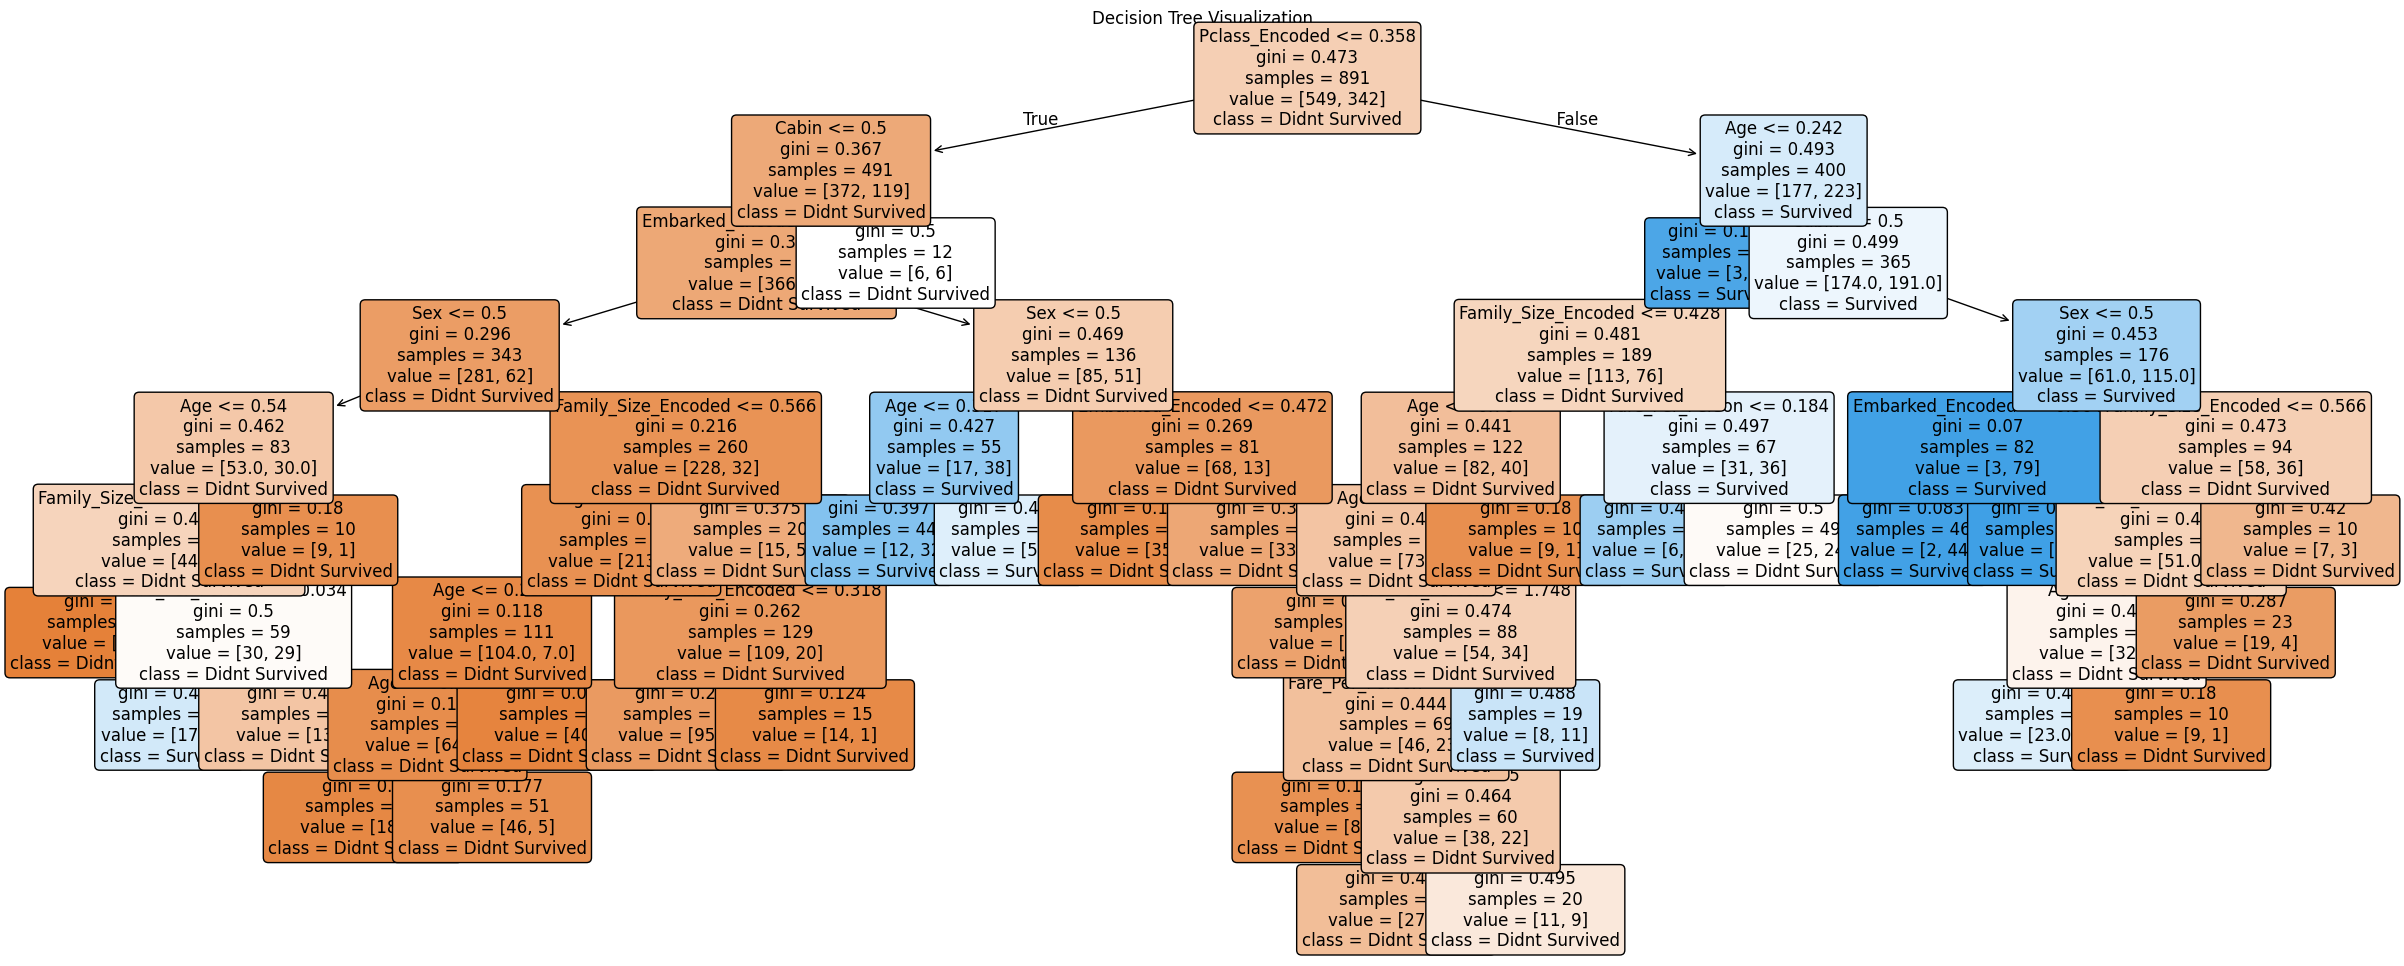

In [24]:
plt.figure(figsize=(30, 12))
plot_tree(dt,
          feature_names=X_train.columns,
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()


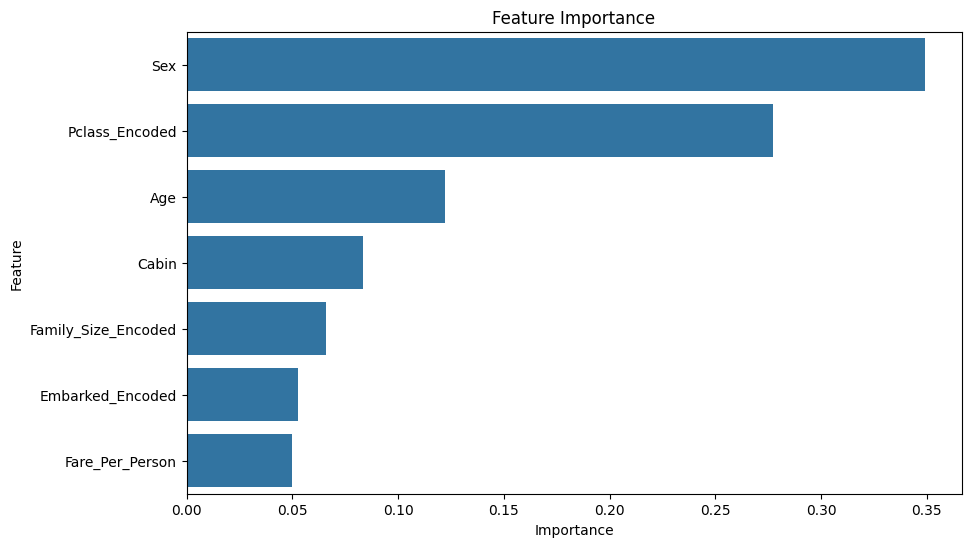

In [25]:
import seaborn as sns

# Get feature importances
importances = dt.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()
